In [59]:
#question no. 1
import pandas as pd
file_path = 'Downloads/hiring.csv'
hiring_data = pd.read_csv(file_path)
hiring_data.head()


,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000


In [7]:

def convert_experience(x):
    if isinstance(x, str):
        return float(x.split()[0]) 
    return 0 if pd.isna(x) else x

hiring_data['experience'] = hiring_data['experience'].apply(convert_experience)


In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
hiring_data['test_score(out of 10)'] = imputer.fit_transform(hiring_data[['test_score(out of 10)']])


In [9]:
X = hiring_data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = hiring_data['salary']


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [11]:
import numpy as np
candidates = np.array([[2, 8, 6], [12, 10, 10]])
predicted_salaries = model.predict(candidates)
predicted_salaries


c:\users\arpan-pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51360.26200873, 92002.18340611])

In [14]:
#question no. 2
import pandas as pd

# Load the dataset
hr_data = pd.read_csv('Downloads/HR_comma_sep.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
hr_data_encoded = pd.get_dummies(hr_data, columns=['Department', 'salary'], drop_first=True)
correlation_matrix = hr_data_encoded.corr()
correlation_with_left = correlation_matrix['left'].sort_values(ascending=False)
correlation_with_left


left                      1.000000
time_spend_company        0.144822
salary_low                0.134722
average_montly_hours      0.071287
Department_hr             0.028249
number_project            0.023787
Department_technical      0.020076
Department_accounting     0.015201
Department_support        0.010700
Department_sales          0.009923
last_evaluation           0.006567
Department_marketing     -0.000859
Department_product_mng   -0.011029
Department_management    -0.046035
Department_RandD         -0.046596
promotion_last_5years    -0.061788
salary_medium            -0.068833
Work_accident            -0.154622
satisfaction_level       -0.388375
Name: left, dtype: float64

In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\arpan-pc\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\arpan-pc\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


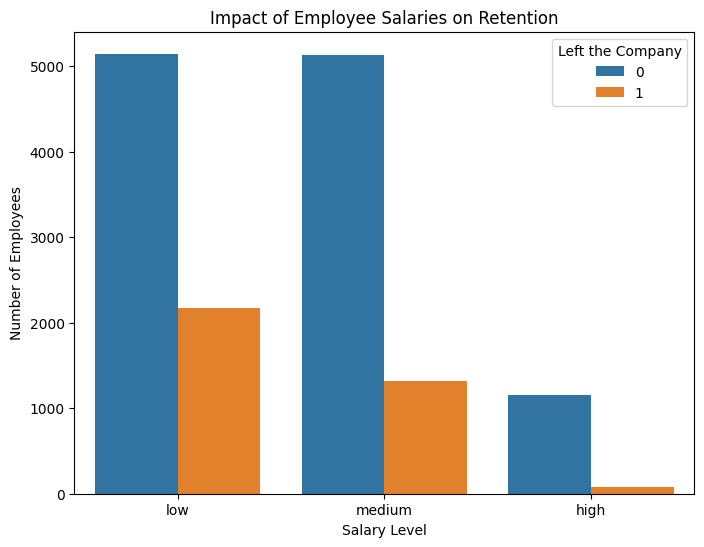

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(data=hr_data, x='salary', hue='left')
plt.title('Impact of Employee Salaries on Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Left the Company', loc='upper right')
plt.show()


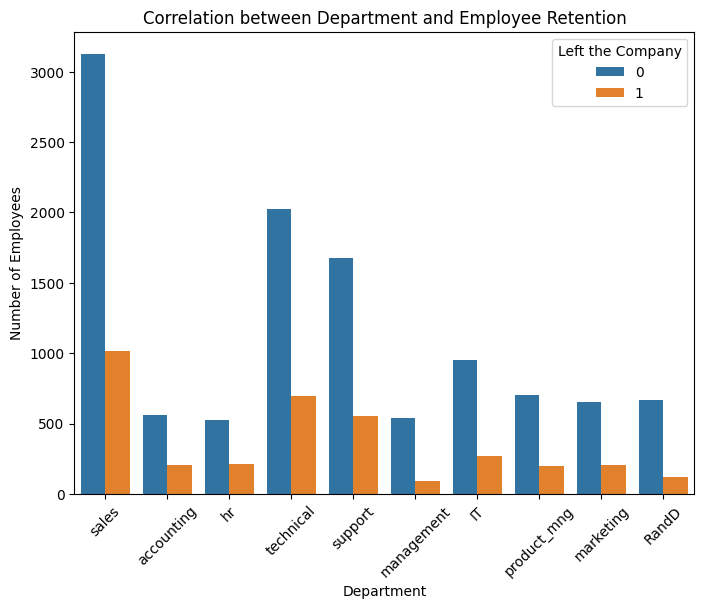

In [24]:

plt.figure(figsize=(8,6))
sns.countplot(data=hr_data, x='Department', hue='left')
plt.title('Correlation between Department and Employee Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Left the Company', loc='upper right')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


hr_data_encoded = pd.get_dummies(hr_data, columns=['Department', 'salary'], drop_first=True)


X = hr_data_encoded.drop('left', axis=1)
y = hr_data_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)


In [27]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the logistic regression model: {accuracy * 100:.2f}%')


Accuracy of the logistic regression model: 78.56%


In [28]:
#question no 4

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('Downloads/Bengaluru_House_Data.csv')

In [30]:
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000     

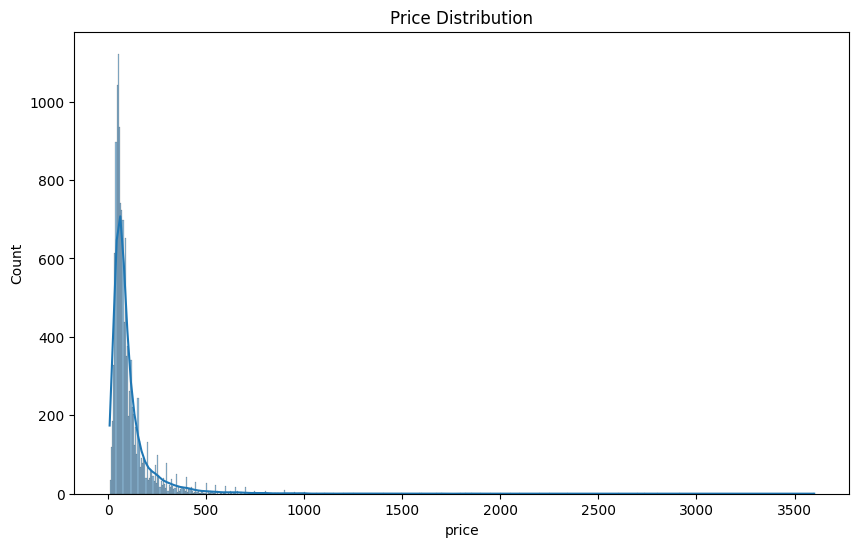

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data['price'], kde=True)
plt.title('Price Distribution')
plt.show()

In [32]:
data = data.drop(columns=['society', 'balcony', 'availability'], errors='ignore')


data = data.dropna(subset=['size', 'location', 'total_sqft', 'bath', 'price'])  # Dropping rows with missing key info


print(data.isnull().sum())

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64


In [33]:
import numpy as np


def convert_sqft_to_num(x):
    if '-' in x:
        vals = x.split('-')
        return (float(vals[0]) + float(vals[1])) / 2
    try:
        return float(x)
    except:
        return None


data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)

# Convert square meters to square feet (1 sqm = 10.764 sqft)
data['total_sqft'] = data['total_sqft'].apply(lambda x: x * 10.764 if x and 'Sq. Meter' in str(x) else x)


In [34]:
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']


In [35]:
# Remove outliers where sqft per bhk is too low
data = data[~((data['total_sqft'] / data['size'].apply(lambda x: float(x.split()[0]))) < 300)]

# Remove properties with suspicious bhk and sqft values
data = data[(data['total_sqft'] > 300) & (data['size'].apply(lambda x: float(x.split()[0])) <= 10)]


In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (mean - std)) & (subdf['price_per_sqft'] <= (mean + std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

data = remove_pps_outliers(data)


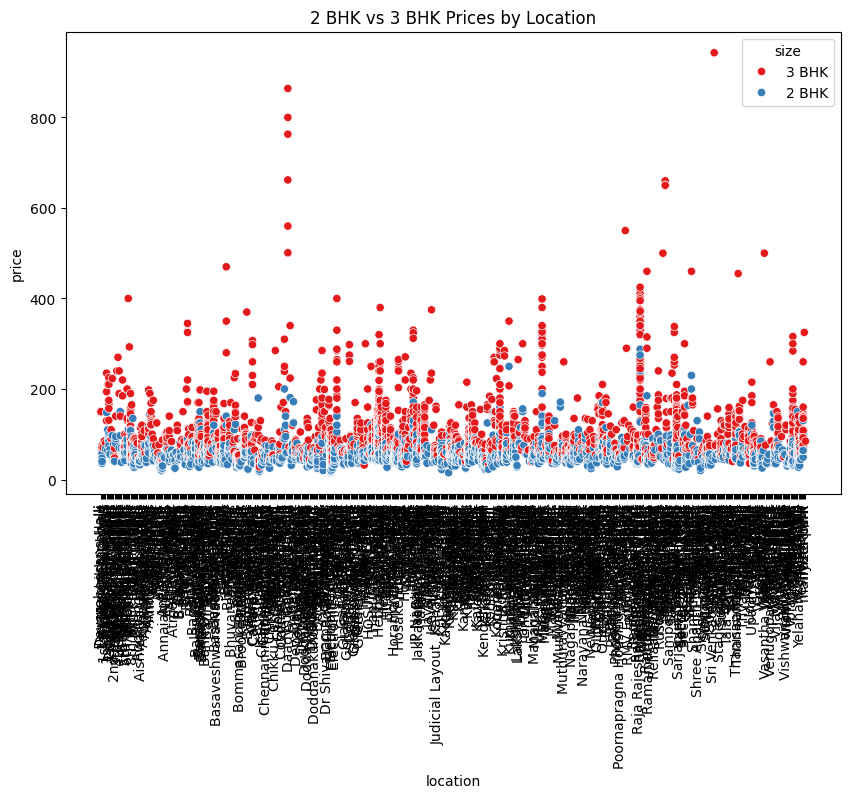

In [37]:
# Scatter plot comparing 2 BHK and 3 BHK prices
bhk_data = data[(data['size'] == '2 BHK') | (data['size'] == '3 BHK')]

plt.figure(figsize=(10,6))
sns.scatterplot(data=bhk_data, x='location', y='price', hue='size', palette='Set1')
plt.title('2 BHK vs 3 BHK Prices by Location')
plt.xticks(rotation=90)
plt.show()


In [38]:
# Remove properties where bathroom count exceeds bhk + 2
data = data[data['bath'] < data['size'].apply(lambda x: float(x.split()[0])) + 2]


In [39]:
#question num 5

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np


In [40]:
digits = datasets.load_digits()

In [41]:
X = digits.data
y = digits.target


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
svm_clf = SVC()


In [44]:
svm_clf.fit(X_train, y_train)

SVC()

In [45]:
y_pred = svm_clf.predict(X_test)

In [46]:
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {initial_accuracy * 100:.2f}%")

Initial Accuracy: 98.61%


In [47]:
best_accuracy = 0
best_params = {}


In [48]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for gamma in [0.001, 0.01, 0.1, 1, 10]:
        svm_clf = SVC(kernel=kernel, gamma=gamma)
        svm_clf.fit(X_train, y_train)
        y_pred = svm_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'kernel': kernel, 'gamma': gamma}

In [49]:
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Parameters: Kernel = {best_params['kernel']}, Gamma = {best_params['gamma']}")

Best Accuracy: 98.89%
Best Parameters: Kernel = rbf, Gamma = 0.001


In [50]:
#question no. 6

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [52]:
data = pd.read_csv('Downloads/spam.csv', encoding='ISO-8859-1')


In [53]:
data_cleaned = data[['Category', 'Message']].dropna()


In [54]:
data_cleaned['Category'] = data_cleaned['Category'].map({'ham': 0, 'spam': 1})


In [55]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned['Message'], data_cleaned['Category'], test_size=0.2, random_state=42)


In [56]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [57]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)


MultinomialNB()

In [58]:
y_pred = nb_classifier.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
classification_report_text = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_text)


Accuracy: 0.9838565022421525
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

